In [1449]:
import pandas as pd
import numpy as np
import math

from bs4 import BeautifulSoup

from sklearn.feature_extraction.text import CountVectorizer
import shifterator as sh

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn-v0_8-whitegrid') # https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
sns.set_style("whitegrid")

LABEL_0 = negative  
LABEL_1 = neutral  
LABEL_2 = positive 

# 1. BERT

In [ ]:
sentiment_bert = pd.read_excel('leaders_sentiment_bert.xlsx') # from Colab Sentiment_BERT
sentiment_bert = sentiment_bert[["nimi", "erakond", 'kuupäev', 'postitus', 'lemma_text','bert_text', 'sentiment_bert']]
sentiment_bert

# 2. EKT1
- https://github.com/EKT1/valence

In [411]:
sentiment_ekt = pd.read_excel('leaders_bert.xlsx')
sentiment_ekt.head()

,nimi,erakond,kuupäev,postitus,clean_text,estnltk_text,lemma_text,bert_text
0,E200,E200,2023-03-14 08:47:15,Me ei tohi väsida Ukraina toetamisest!,tohi väsida ukraina toetamisest,Text(text='tohi väsida ukraina toetamisest'),tohtima väsima ukraina toetamine,ei tohi väsida ukraina toetamisest!
1,E200,E200,2023-02-24 12:25:09,Meie iseseisvuspäev ja Ukraina on kurval moel ...,iseseisvuspäev ukraina kurval moel seotud täna...,Text(text='iseseisvuspäev ukraina kurval moel ...,iseseisvuspäev ukraina kurb mood seotud täna m...,meie iseseisvuspäev ukraina kurval moel seotud...
2,E200,E200,2023-02-24 00:55:51,105 aastat tagasi algas Eesti ja aasta tagasi ...,aastat eesti aasta ukraina teekond euroopasse ...,Text(text='aastat eesti aasta ukraina teekond ...,aasta eesti aasta ukraina teekond euroopasse e...,105 aastat tagasi algas eesti aasta tagasi ukr...
3,E200,E200,2023-02-21 17:36:03,"Vladimir Putini tänane suur kõne, mis pidi löö...",putini tänane suur kõne lööma laineid juhtima ...,Text(text='putini tänane suur kõne lööma laine...,putin tänane suur kõne lööma laine juhtima täh...,"putini tänane suur kõne, mis pidi lööma lainei..."
4,E200,E200,2023-02-13 10:06:46,"Sinu kandidaadid Hiiu-, Lääne- ja Saaremaal. T...",kandidaadid hiiu lääne saaremaal tutvu lähemal...,Text(text='kandidaadid hiiu lääne saaremaal tu...,kandidaat hiid lääs saaremaa tutvuma lähemalt ...,"sinu kandidaadid hiiu -, lääne - saaremaal. tu..."


In [518]:
import codecs
import os

with codecs.open("textfile.txt", "w", encoding='utf-8-sig') as temp:
    for text in sentiment_ekt['bert_text']:
        temp.write(str(text + '\\' + os.linesep))

In [519]:
!python ./valence-master/valencecolor.py textfile.txt

Most Informative Features
                   hästi = True           positi : neutra =     14.4 : 1.0
                     ega = True           negati : neutra =     11.1 : 1.0
             poolfinaali = True           positi : negati =      9.8 : 1.0
                   tugev = True           positi : negati =      9.8 : 1.0
                politsei = True           negati : positi =      9.7 : 1.0
             ääremängija = True           neutra : negati =      9.3 : 1.0
                     hea = True           positi : neutra =      9.1 : 1.0
                koondise = True           positi : negati =      9.0 : 1.0
                    Tähe = True           positi : negati =      8.5 : 1.0
                hariduse = True           positi : negati =      8.5 : 1.0
                  jätkab = True           positi : negati =      8.5 : 1.0
               korvpalli = True           positi : negati =      8.5 : 1.0
                 minutit = True           positi : negati =      8.5 : 1.0

Load corpus: C:\Users\lisannal\OneDrive - Tartu Ülikool\Töölaud\THESIS\MSC-thesis\leaders_analysis\valence-master\valence\korpus.csv
Train
None


In [520]:
def create_sentiment_label_same_as_bert(array):
    idx = np.array(array).argmax()
    if (idx == 0):
        return 'LABEL_2'
    elif (idx == 1):
        return 'LABEL_0'
    else:
        return 'LABEL_1'

In [521]:
# [positive, negative, neutral]
row_results = []
with open('textfile.txt.html', 'r', encoding='utf-8') as f:

    contents = f.read()

    soup = BeautifulSoup(contents, 'lxml')
    infos = soup.body.find_all('span', {"class": "info"})
    print(len(infos))
    for info in infos:
        text = info.text
        text = text.split('Probability:')[1]
        text = text.replace('positive =', '').replace('negative =', '').replace('neutral =', '').replace('\xa0 ', ' ')
        text = text.split(' ')[1:]
        #print(text)
        row_results.append(create_sentiment_label_same_as_bert(text))

3223


In [522]:
sentiment_ekt['sentiment_ekt'] = row_results

In [526]:
sentiment_ekt['sentiment_ekt'].value_counts()

LABEL_2    2008
LABEL_0    1087
LABEL_1     128
Name: sentiment_ekt, dtype: int64

In [527]:
# save file
sentiment_ekt.to_excel('leaders_sentiment_ekt.xlsx', index = False)

In [ ]:
sentiment_ekt = pd.read_excel('leaders_sentiment_ekt.xlsx', index = False)

# 3. R syuzhet

In [ ]:
sentiment_R = pd.read_excel('leaders_sentiment_syuzhet.xlsx')
sentiment_R = sentiment_R.rename(columns={"sentiment_label": "sentiment_syuzhet"})
sentiment_R = sentiment_R[["nimi", "erakond", 'kuupäev', 'bert_text', 'sentiment_syuzhet']]
sentiment_R

In [1171]:
sentiment_R['sentiment_syuzhet'].value_counts()

LABEL_1    2668
LABEL_0     313
LABEL_2     242
Name: sentiment_syuzhet, dtype: int64

# Merge sentiments

In [1172]:
sentiments = pd.merge(sentiment_bert, sentiment_ekt[['kuupäev','sentiment_ekt']], on='kuupäev', how='left')
sentiments = pd.merge(sentiments, sentiment_R[['kuupäev','sentiment_syuzhet']], on='kuupäev', how='left')
sentiments

,nimi,erakond,kuupäev,postitus,lemma_text,bert_text,sentiment_bert,sentiment_ekt,sentiment_syuzhet
0,E200,E200,2023-03-14 08:47:15,Me ei tohi väsida Ukraina toetamisest!,tohtima väsima ukraina toetamine,ei tohi väsida ukraina toetamisest!,LABEL_0,LABEL_0,LABEL_1
1,E200,E200,2023-02-24 12:25:09,Meie iseseisvuspäev ja Ukraina on kurval moel ...,iseseisvuspäev ukraina kurb mood seotud täna m...,meie iseseisvuspäev ukraina kurval moel seotud...,LABEL_2,LABEL_2,LABEL_2
2,E200,E200,2023-02-24 00:55:51,105 aastat tagasi algas Eesti ja aasta tagasi ...,aasta eesti aasta ukraina teekond euroopasse e...,105 aastat tagasi algas eesti aasta tagasi ukr...,LABEL_2,LABEL_2,LABEL_1
3,E200,E200,2023-02-21 17:36:03,"Vladimir Putini tänane suur kõne, mis pidi löö...",putin tänane suur kõne lööma laine juhtima täh...,"putini tänane suur kõne, mis pidi lööma lainei...",LABEL_0,LABEL_1,LABEL_1
4,E200,E200,2023-02-13 10:06:46,"Sinu kandidaadid Hiiu-, Lääne- ja Saaremaal. T...",kandidaat hiid lääs saaremaa tutvuma lähemalt ...,"sinu kandidaadid hiiu -, lääne - saaremaal. tu...",LABEL_1,LABEL_1,LABEL_1
...,...,...,...,...,...,...,...,...,...
3218,Sotsid,SDE,2022-04-14 12:03:35,"""Ärme kruti sellisel kombel ise pingeid ja ärm...",kruttima komme pinge solvama täna raskem kutsu...,""" ärme kruti sellisel kombel ise pingeid ärme ...",LABEL_0,LABEL_0,LABEL_1
3219,Sotsid,SDE,2022-04-13 17:00:24,🇺🇦⚖ Esmaspäeval võeti Riigikogus vastu välisma...,esmaspäev võtma riigikogu välismaalane seadus ...,esmaspäeval võeti riigikogus vastu välismaalas...,LABEL_0,LABEL_2,LABEL_1
3220,Sotsid,SDE,2022-04-12 10:31:59,⚖ Riigikogus võeti vastu välismaalaste seaduse...,riigikogu võtma välismaalane seadus välismaala...,riigikogus võeti vastu välismaalaste seaduse v...,LABEL_2,LABEL_0,LABEL_1
3221,Sotsid,SDE,2022-01-05 08:56:41,Narvas tähistati üleeile Vabadussõja relvarahu...,narva tähistama üleeile vabadussõda relvarahu ...,narvas tähistati üleeile vabadussõja relvarahu...,LABEL_2,LABEL_2,LABEL_1


# Majority voting

In [1280]:
# https://stackoverflow.com/questions/43990485/set-pandas-dataframe-winner-column-value-based-on-majority-value-from-three-othe

mostCommonVote = []
for row in sentiments[['sentiment_bert','sentiment_ekt','sentiment_syuzhet']].values:
    num_values = [int(value.split('_')[1]) for value in row]
    #average_label = round(np.sum(num_values) / len(row))
    mode_label = max(set(num_values), key=num_values.count)
    if len(set(num_values)) == 3: # if 3 different values, then neutral
        mode_label = 1
    mostCommonVote.append('LABEL_' + str(mode_label))

sentiments['winner'] = mostCommonVote

In [1281]:
sentiments

,nimi,erakond,kuupäev,postitus,lemma_text,bert_text,sentiment_bert,sentiment_ekt,sentiment_syuzhet,winner
0,E200,E200,2023-03-14 08:47:15,Me ei tohi väsida Ukraina toetamisest!,tohtima väsima ukraina toetamine,ei tohi väsida ukraina toetamisest!,LABEL_0,LABEL_0,LABEL_1,LABEL_0
1,E200,E200,2023-02-24 12:25:09,Meie iseseisvuspäev ja Ukraina on kurval moel ...,iseseisvuspäev ukraina kurb mood seotud täna m...,meie iseseisvuspäev ukraina kurval moel seotud...,LABEL_2,LABEL_2,LABEL_2,LABEL_2
2,E200,E200,2023-02-24 00:55:51,105 aastat tagasi algas Eesti ja aasta tagasi ...,aasta eesti aasta ukraina teekond euroopasse e...,105 aastat tagasi algas eesti aasta tagasi ukr...,LABEL_2,LABEL_2,LABEL_1,LABEL_2
3,E200,E200,2023-02-21 17:36:03,"Vladimir Putini tänane suur kõne, mis pidi löö...",putin tänane suur kõne lööma laine juhtima täh...,"putini tänane suur kõne, mis pidi lööma lainei...",LABEL_0,LABEL_1,LABEL_1,LABEL_1
4,E200,E200,2023-02-13 10:06:46,"Sinu kandidaadid Hiiu-, Lääne- ja Saaremaal. T...",kandidaat hiid lääs saaremaa tutvuma lähemalt ...,"sinu kandidaadid hiiu -, lääne - saaremaal. tu...",LABEL_1,LABEL_1,LABEL_1,LABEL_1
...,...,...,...,...,...,...,...,...,...,...
3218,Sotsid,SDE,2022-04-14 12:03:35,"""Ärme kruti sellisel kombel ise pingeid ja ärm...",kruttima komme pinge solvama täna raskem kutsu...,""" ärme kruti sellisel kombel ise pingeid ärme ...",LABEL_0,LABEL_0,LABEL_1,LABEL_0
3219,Sotsid,SDE,2022-04-13 17:00:24,🇺🇦⚖ Esmaspäeval võeti Riigikogus vastu välisma...,esmaspäev võtma riigikogu välismaalane seadus ...,esmaspäeval võeti riigikogus vastu välismaalas...,LABEL_0,LABEL_2,LABEL_1,LABEL_1
3220,Sotsid,SDE,2022-04-12 10:31:59,⚖ Riigikogus võeti vastu välismaalaste seaduse...,riigikogu võtma välismaalane seadus välismaala...,riigikogus võeti vastu välismaalaste seaduse v...,LABEL_2,LABEL_0,LABEL_1,LABEL_1
3221,Sotsid,SDE,2022-01-05 08:56:41,Narvas tähistati üleeile Vabadussõja relvarahu...,narva tähistama üleeile vabadussõda relvarahu ...,narvas tähistati üleeile vabadussõja relvarahu...,LABEL_2,LABEL_2,LABEL_1,LABEL_2


In [1282]:
sentiments['winner'].value_counts()

LABEL_1    1600
LABEL_2     899
LABEL_0     724
Name: winner, dtype: int64

# Topics to sentiments df

In [1345]:
topics = pd.read_excel('leaders_topics_bertopic.xlsx')
topics.head()

,nimi,erakond,kuupäev,postitus,clean_text,estnltk_text,lemma_text,bert_text,bert_topic_id
0,E200,E200,2023-03-14 08:47:15,Me ei tohi väsida Ukraina toetamisest!,tohi väsida ukraina toetamisest,Text(text='tohi väsida ukraina toetamisest'),tohtima väsima ukraina toetamine,ei tohi väsida ukraina toetamisest!,Ukraine war
1,E200,E200,2023-02-24 12:25:09,Meie iseseisvuspäev ja Ukraina on kurval moel ...,iseseisvuspäev ukraina kurval moel seotud täna...,Text(text='iseseisvuspäev ukraina kurval moel ...,iseseisvuspäev ukraina kurb mood seotud täna m...,meie iseseisvuspäev ukraina kurval moel seotud...,Ukraine war
2,E200,E200,2023-02-24 00:55:51,105 aastat tagasi algas Eesti ja aasta tagasi ...,aastat eesti aasta ukraina teekond euroopasse ...,Text(text='aastat eesti aasta ukraina teekond ...,aasta eesti aasta ukraina teekond euroopasse e...,105 aastat tagasi algas eesti aasta tagasi ukr...,Ukraine war
3,E200,E200,2023-02-21 17:36:03,"Vladimir Putini tänane suur kõne, mis pidi löö...",putini tänane suur kõne lööma laineid juhtima ...,Text(text='putini tänane suur kõne lööma laine...,putin tänane suur kõne lööma laine juhtima täh...,"putini tänane suur kõne, mis pidi lööma lainei...",Ukraine war
4,E200,E200,2023-02-13 10:06:46,"Sinu kandidaadid Hiiu-, Lääne- ja Saaremaal. T...",kandidaadid hiiu lääne saaremaal tutvu lähemal...,Text(text='kandidaadid hiiu lääne saaremaal tu...,kandidaat hiid lääs saaremaa tutvuma lähemalt ...,"sinu kandidaadid hiiu -, lääne - saaremaal. tu...",Ukraine war


In [1346]:
# merge topics with sentiments
sentiments_topics = pd.merge(sentiments, topics[['kuupäev','bert_topic_id']], on='kuupäev', how='left')
sentiments_topics.head()

,nimi,erakond,kuupäev,postitus,lemma_text,bert_text,sentiment_bert,sentiment_ekt,sentiment_syuzhet,winner,bert_topic_id
0,E200,E200,2023-03-14 08:47:15,Me ei tohi väsida Ukraina toetamisest!,tohtima väsima ukraina toetamine,ei tohi väsida ukraina toetamisest!,LABEL_0,LABEL_0,LABEL_1,LABEL_0,Ukraine war
1,E200,E200,2023-02-24 12:25:09,Meie iseseisvuspäev ja Ukraina on kurval moel ...,iseseisvuspäev ukraina kurb mood seotud täna m...,meie iseseisvuspäev ukraina kurval moel seotud...,LABEL_2,LABEL_2,LABEL_2,LABEL_2,Ukraine war
2,E200,E200,2023-02-24 00:55:51,105 aastat tagasi algas Eesti ja aasta tagasi ...,aasta eesti aasta ukraina teekond euroopasse e...,105 aastat tagasi algas eesti aasta tagasi ukr...,LABEL_2,LABEL_2,LABEL_1,LABEL_2,Ukraine war
3,E200,E200,2023-02-21 17:36:03,"Vladimir Putini tänane suur kõne, mis pidi löö...",putin tänane suur kõne lööma laine juhtima täh...,"putini tänane suur kõne, mis pidi lööma lainei...",LABEL_0,LABEL_1,LABEL_1,LABEL_1,Ukraine war
4,E200,E200,2023-02-13 10:06:46,"Sinu kandidaadid Hiiu-, Lääne- ja Saaremaal. T...",kandidaat hiid lääs saaremaa tutvuma lähemalt ...,"sinu kandidaadid hiiu -, lääne - saaremaal. tu...",LABEL_1,LABEL_1,LABEL_1,LABEL_1,Ukraine war


In [1347]:
sentiments_topics['bert_topic_id'].unique()

array(['Ukraine war', 'Sports', 'History', 'Education', 'Elections',
       'Religion', 'Defence', 'Environment', 'Economy', 'Allies',
       'Energy security', 'Discussion'], dtype=object)

In [1348]:
# rename 'winner' to 'sentiment'
sentiments_topics = sentiments_topics.rename(columns={"winner": "sentiment"})

# rename values in 'sentiment' column
sentiments_topics['sentiment'] = sentiments_topics['sentiment'].replace(['LABEL_0', 'LABEL_1', 'LABEL_2'],
                                                           ['negative', 'neutral', 'positive'])

In [1349]:
# create a new column with month and year combined
sentiments_topics['kuupäev'] = pd.to_datetime(sentiments_topics['kuupäev'])

sentiments_topics['month_year'] = sentiments_topics['kuupäev'].dt.strftime('%b%y')
sentiments_topics

,nimi,erakond,kuupäev,postitus,lemma_text,bert_text,sentiment_bert,sentiment_ekt,sentiment_syuzhet,sentiment,bert_topic_id,month_year
0,E200,E200,2023-03-14 08:47:15,Me ei tohi väsida Ukraina toetamisest!,tohtima väsima ukraina toetamine,ei tohi väsida ukraina toetamisest!,LABEL_0,LABEL_0,LABEL_1,negative,Ukraine war,Mar23
1,E200,E200,2023-02-24 12:25:09,Meie iseseisvuspäev ja Ukraina on kurval moel ...,iseseisvuspäev ukraina kurb mood seotud täna m...,meie iseseisvuspäev ukraina kurval moel seotud...,LABEL_2,LABEL_2,LABEL_2,positive,Ukraine war,Feb23
2,E200,E200,2023-02-24 00:55:51,105 aastat tagasi algas Eesti ja aasta tagasi ...,aasta eesti aasta ukraina teekond euroopasse e...,105 aastat tagasi algas eesti aasta tagasi ukr...,LABEL_2,LABEL_2,LABEL_1,positive,Ukraine war,Feb23
3,E200,E200,2023-02-21 17:36:03,"Vladimir Putini tänane suur kõne, mis pidi löö...",putin tänane suur kõne lööma laine juhtima täh...,"putini tänane suur kõne, mis pidi lööma lainei...",LABEL_0,LABEL_1,LABEL_1,neutral,Ukraine war,Feb23
4,E200,E200,2023-02-13 10:06:46,"Sinu kandidaadid Hiiu-, Lääne- ja Saaremaal. T...",kandidaat hiid lääs saaremaa tutvuma lähemalt ...,"sinu kandidaadid hiiu -, lääne - saaremaal. tu...",LABEL_1,LABEL_1,LABEL_1,neutral,Ukraine war,Feb23
...,...,...,...,...,...,...,...,...,...,...,...,...
3218,Sotsid,SDE,2022-04-14 12:03:35,"""Ärme kruti sellisel kombel ise pingeid ja ärm...",kruttima komme pinge solvama täna raskem kutsu...,""" ärme kruti sellisel kombel ise pingeid ärme ...",LABEL_0,LABEL_0,LABEL_1,negative,Religion,Apr22
3219,Sotsid,SDE,2022-04-13 17:00:24,🇺🇦⚖ Esmaspäeval võeti Riigikogus vastu välisma...,esmaspäev võtma riigikogu välismaalane seadus ...,esmaspäeval võeti riigikogus vastu välismaalas...,LABEL_0,LABEL_2,LABEL_1,neutral,Ukraine war,Apr22
3220,Sotsid,SDE,2022-04-12 10:31:59,⚖ Riigikogus võeti vastu välismaalaste seaduse...,riigikogu võtma välismaalane seadus välismaala...,riigikogus võeti vastu välismaalaste seaduse v...,LABEL_2,LABEL_0,LABEL_1,neutral,Ukraine war,Apr22
3221,Sotsid,SDE,2022-01-05 08:56:41,Narvas tähistati üleeile Vabadussõja relvarahu...,narva tähistama üleeile vabadussõda relvarahu ...,narvas tähistati üleeile vabadussõja relvarahu...,LABEL_2,LABEL_2,LABEL_1,positive,History,Jan22


In [1350]:
# rename values in 'sentiment' column
sentiments_topics['bert_topic_id'] = sentiments_topics['bert_topic_id'].replace(['Ukraine war'],
                                                           ['War'])

In [1454]:
# rename topics
sentiments_topics['bert_topic_id'] = sentiments_topics['bert_topic_id'].replace(['Discussion', 'Elections', 'Religion'],
                                ['News', 'Politics', 'Politics'])

C:\Users\lisannal\AppData\Local\Temp\ipykernel_5500\3504009188.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiments_topics['bert_topic_id'] = sentiments_topics['bert_topic_id'].replace(['Discussion', 'Elections', 'Religion'],


In [1456]:
sentiments_topics['bert_topic_id'].value_counts()

War                1623
Allies              422
Politics            242
Defence             199
History             144
Energy security     139
Economy             127
Sports              109
Education           105
News                 66
Environment          39
Name: bert_topic_id, dtype: int64

In [1288]:
# save file
sentiments_topics.to_excel('sentiments_topics.xlsx', index = False)

# Topics x sentiment Analysis

## Frequency of positive, negative and neutral posts

In [1351]:
sentiments_topics = sentiments_topics[sentiments_topics['month_year'] != 'Apr23']

In [1457]:
# overall sentiment classes
sentiments_topics['sentiment'].value_counts()

neutral     1597
positive     899
negative     719
Name: sentiment, dtype: int64

In [1413]:
timeline = sentiments_topics[['month_year']]
timeline = timeline.groupby('month_year')
#timeline = timeline.reset_index(name='count')

#timeline = timeline.pivot(index='month_year', values='count')
timeline = timeline.value_counts()
timeline = pd.DataFrame(timeline)
order= ['Jan22', 'Feb22', 'Mar22', 'Apr22', 'May22', 'Jun22', 'Jul22', 'Aug22', 'Sep22', 'Oct22', 'Nov22',
                      'Dec22','Jan23', 'Feb23', 'Mar23']
timeline = timeline.reindex(order)
timeline = timeline.rename(columns={0: "count"})

timeline

,count
month_year,
Jan22,78
Feb22,255
Mar22,483
Apr22,364
May22,271
Jun22,163
Jul22,92
Aug22,171
Sep22,226


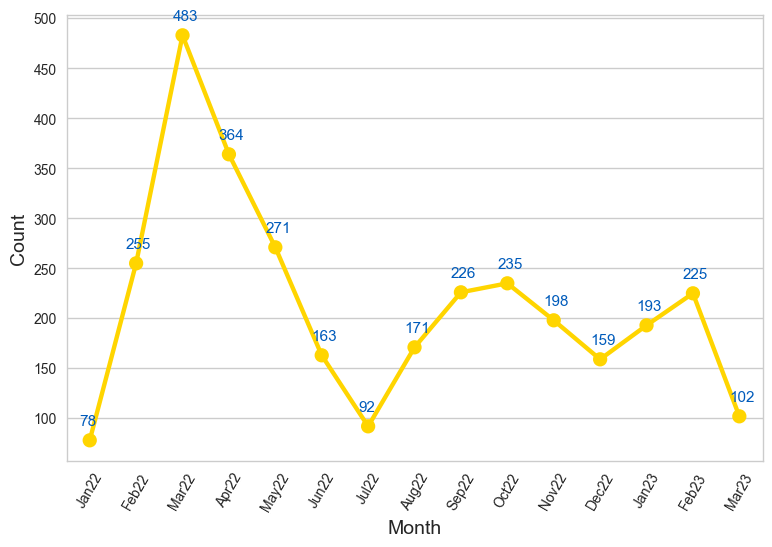

In [1452]:
ax = sns.pointplot(data=timeline, x = timeline.index, y = 'count', color = '#FFD500')

[ax.text(p[0]- 0.22, p[1] + 15, p[1], color='#005BBB', size=11) for p in zip(ax.get_xticks(), timeline['count'])]


plt.xticks(rotation=60)
plt.xlabel("Month")
plt.ylabel("Count")

plt.savefig('leaders_timeline', facecolor=fig.get_facecolor(), bbox_inches='tight')

plt.show()

In [1322]:
# posts per month

placeholder = sentiments_topics[['kuupäev']]
placeholder = placeholder.groupby(pd.Grouper(key='kuupäev', freq='1M')).size() # groupby each 1 month
placeholder.index = placeholder.index.strftime('%B')
placeholder

kuupäev
January       78
February     255
March        483
April        364
May          271
June         163
July          92
August       171
September    226
October      235
November     198
December     159
January      193
February     225
March        102
dtype: int64

In [1459]:
# sentiment freqs per month 
sentiments_topics['kuupäev'] = sentiments_topics['kuupäev'].apply(pd.to_datetime)

label_counts = sentiments_topics.groupby([pd.Grouper(key='kuupäev', freq='1M'), 'sentiment']).size()
label_counts = label_counts.reset_index(name='count')

label_counts = label_counts.pivot(index='kuupäev', columns='sentiment', values='count')

label_counts.index = label_counts.index.strftime('%B')
label_counts.index = ['Jan22', 'Feb22', 'Mar22', 'Apr22', 'May22', 'Jun22', 'Jul22', 'Aug22', 'Sep22', 'Oct22', 'Nov22',
                      'Dec22','Jan23', 'Feb23', 'Mar23']
label_counts

C:\Users\lisannal\AppData\Local\Temp\ipykernel_5500\3788967867.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiments_topics['kuupäev'] = sentiments_topics['kuupäev'].apply(pd.to_datetime)


sentiment,negative,neutral,positive
Jan22,17,42,19
Feb22,55,135,65
Mar22,117,262,104
Apr22,101,177,86
May22,52,146,73
Jun22,31,79,53
Jul22,20,38,34
Aug22,44,92,35
Sep22,54,108,64
Oct22,55,115,65


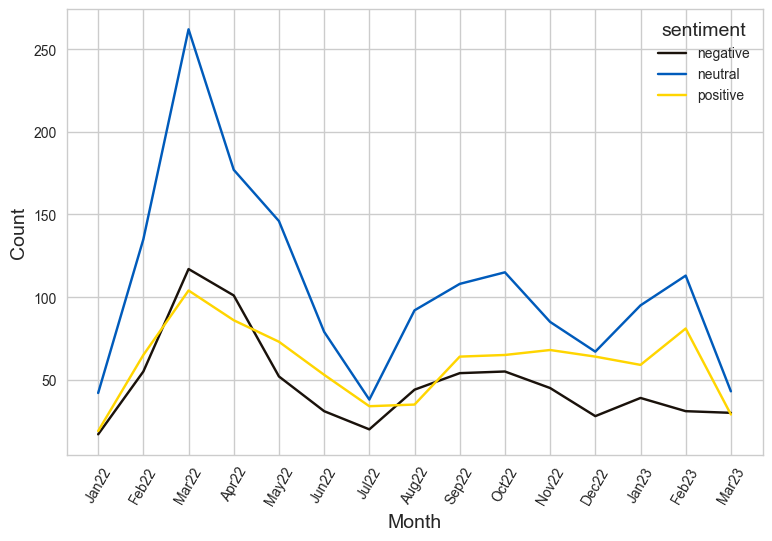

In [1463]:
custom_palette = ["#1A120B", "#005BBB", '#FFD500']

sns.lineplot(data=label_counts, dashes=False, palette=custom_palette)
plt.xticks(rotation=60)
plt.xlabel("Month")
plt.ylabel("Count")

plt.savefig('leaders_sentiment_timeline', facecolor=fig.get_facecolor(), bbox_inches='tight')

plt.show()

In [1617]:
# add week to df

sentiments_topics['week'] = sentiments_topics['kuupäev'].dt.strftime('%G_%V')
sentiments_topics['week'] = pd.Categorical(sentiments_topics['week'], 
                                           categories=sentiments_topics['week'].unique().sort(), ordered=True)
#sentiments_topics = sentiments_topics[(sentiments_topics['week']!='2021_52')] 

sentiments_topics

C:\Users\lisannal\AppData\Local\Temp\ipykernel_5500\235276702.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiments_topics['week'] = sentiments_topics['kuupäev'].dt.strftime('%G_%V')
C:\Users\lisannal\AppData\Local\Temp\ipykernel_5500\235276702.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiments_topics['week'] = pd.Categorical(sentiments_topics['week'],


,nimi,erakond,kuupäev,postitus,lemma_text,bert_text,sentiment_bert,sentiment_ekt,sentiment_syuzhet,sentiment,bert_topic_id,month_year,week
0,E200,E200,2023-03-14 08:47:15,Me ei tohi väsida Ukraina toetamisest!,tohtima väsima ukraina toetamine,ei tohi väsida ukraina toetamisest!,LABEL_0,LABEL_0,LABEL_1,negative,War,Mar23,2023_11
1,E200,E200,2023-02-24 12:25:09,Meie iseseisvuspäev ja Ukraina on kurval moel ...,iseseisvuspäev ukraina kurb mood seotud täna m...,meie iseseisvuspäev ukraina kurval moel seotud...,LABEL_2,LABEL_2,LABEL_2,positive,War,Feb23,2023_08
2,E200,E200,2023-02-24 00:55:51,105 aastat tagasi algas Eesti ja aasta tagasi ...,aasta eesti aasta ukraina teekond euroopasse e...,105 aastat tagasi algas eesti aasta tagasi ukr...,LABEL_2,LABEL_2,LABEL_1,positive,War,Feb23,2023_08
3,E200,E200,2023-02-21 17:36:03,"Vladimir Putini tänane suur kõne, mis pidi löö...",putin tänane suur kõne lööma laine juhtima täh...,"putini tänane suur kõne, mis pidi lööma lainei...",LABEL_0,LABEL_1,LABEL_1,neutral,War,Feb23,2023_08
4,E200,E200,2023-02-13 10:06:46,"Sinu kandidaadid Hiiu-, Lääne- ja Saaremaal. T...",kandidaat hiid lääs saaremaa tutvuma lähemalt ...,"sinu kandidaadid hiiu -, lääne - saaremaal. tu...",LABEL_1,LABEL_1,LABEL_1,neutral,War,Feb23,2023_07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3218,Sotsid,SDE,2022-04-14 12:03:35,"""Ärme kruti sellisel kombel ise pingeid ja ärm...",kruttima komme pinge solvama täna raskem kutsu...,""" ärme kruti sellisel kombel ise pingeid ärme ...",LABEL_0,LABEL_0,LABEL_1,negative,Politics,Apr22,2022_15
3219,Sotsid,SDE,2022-04-13 17:00:24,🇺🇦⚖ Esmaspäeval võeti Riigikogus vastu välisma...,esmaspäev võtma riigikogu välismaalane seadus ...,esmaspäeval võeti riigikogus vastu välismaalas...,LABEL_0,LABEL_2,LABEL_1,neutral,War,Apr22,2022_15
3220,Sotsid,SDE,2022-04-12 10:31:59,⚖ Riigikogus võeti vastu välismaalaste seaduse...,riigikogu võtma välismaalane seadus välismaala...,riigikogus võeti vastu välismaalaste seaduse v...,LABEL_2,LABEL_0,LABEL_1,neutral,War,Apr22,2022_15
3221,Sotsid,SDE,2022-01-05 08:56:41,Narvas tähistati üleeile Vabadussõja relvarahu...,narva tähistama üleeile vabadussõda relvarahu ...,narvas tähistati üleeile vabadussõja relvarahu...,LABEL_2,LABEL_2,LABEL_1,positive,History,Jan22,2022_01


In [1620]:
label_counts = sentiments_topics.groupby(['week','sentiment']).size()
label_counts = label_counts.reset_index(name='count')

label_counts = label_counts.pivot(index='week', columns='sentiment', values='count')

label_counts

sentiment,negative,neutral,positive
week,,,
2022_01,4,4,5
2022_02,4,4,3
2022_03,5,14,4
2022_04,4,19,6
2022_05,4,11,8
...,...,...,...
2023_09,9,10,13
2023_10,3,12,5
2023_11,7,6,6


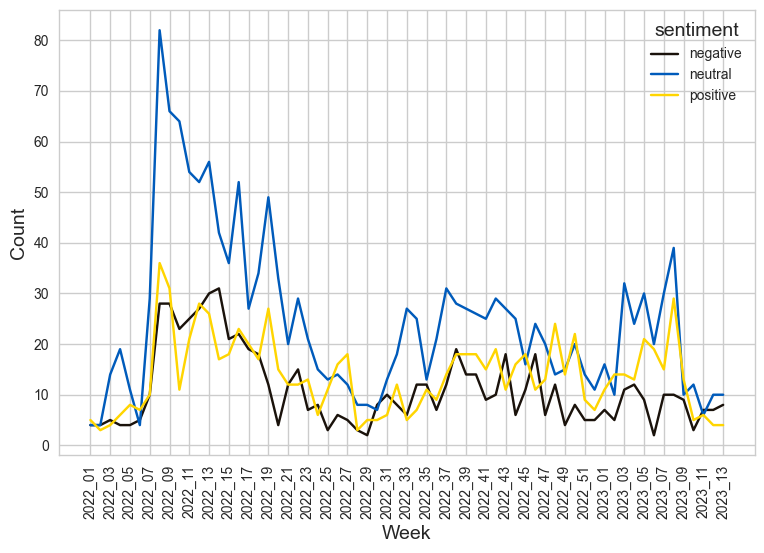

In [1621]:
custom_palette = ["#1A120B", "#005BBB", '#FFD500'] # black, blue, yellow

plot = sns.lineplot(data=label_counts, dashes=False, palette=custom_palette)

plot.set_xticks(plot.get_xticks()[::2])
plt.xticks(rotation=90)
plt.xlabel("Week")
plt.ylabel("Count")

plt.savefig('leaders_sentiment_timeline_weeks', facecolor=fig.get_facecolor(), bbox_inches='tight')

plt.show()

## Visualize sentiment per topic

In [1624]:
negatives = sentiments_topics[sentiments_topics['sentiment'] == 'negative']['bert_topic_id'].value_counts()
negatives = negatives.rename('negative')
totals = sentiments_topics['bert_topic_id'].value_counts()
totals = totals.rename('total')
combined = pd.concat([negatives, totals], axis=1).reset_index()

proportions = []
for idx,row in combined.iterrows():
    proportions.append(row['negative'] / row['total'])
    
combined['proportions'] = proportions
combined = combined.sort_values(by=['proportions'], ascending=False)
label_order = list(combined['index'])

sentiments_topics["bert_topic_id"] = pd.Categorical(sentiments_topics["bert_topic_id"], categories = label_order)
sentiments_topics.sort_values('bert_topic_id')
sentiments_topics['sentiment'] = sentiments_topics['sentiment'].astype('category')

C:\Users\lisannal\AppData\Local\Temp\ipykernel_5500\716208889.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiments_topics["bert_topic_id"] = pd.Categorical(sentiments_topics["bert_topic_id"], categories = label_order)
C:\Users\lisannal\AppData\Local\Temp\ipykernel_5500\716208889.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiments_topics['sentiment'] = sentiments_topics['sentiment'].astype('category')


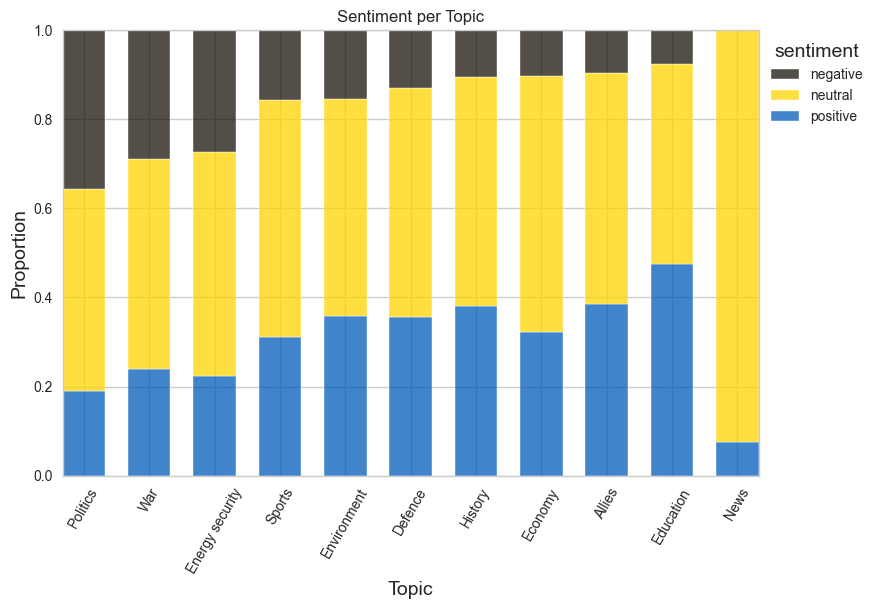

In [1625]:
hist = sns.histplot(sentiments_topics, x="bert_topic_id", hue="sentiment", stat="proportion", discrete=True,
             multiple='fill', palette = [custom_palette[0], custom_palette[2], custom_palette[1]], shrink=0.65)


sns.move_legend(hist, "upper left", bbox_to_anchor=(1, 1))

plt.xticks(rotation=60)
plt.title("Sentiment per Topic")
plt.xlabel("Topic")
#plt.ylabel("Count")

plt.savefig('leaders_sentiment_topics', facecolor=fig.get_facecolor(), bbox_inches='tight')


plt.show()

## Visualize sentiment per topic per month

In [1479]:
sentiments_topics[sentiments_topics['bert_topic_id'] == 'Allies']['sentiment'].value_counts()

neutral     218
positive    163
negative     41
Name: sentiment, dtype: int64

In [1485]:
label_counts[label_counts['bert_topic_id'] == 'Allies']

,bert_topic_id,month_year,sentiment,count
377,Allies,Jan22,positive,5
376,Allies,Jan22,neutral,6
375,Allies,Jan22,negative,1
369,Allies,Feb22,negative,4
370,Allies,Feb22,neutral,19
371,Allies,Feb22,positive,11
389,Allies,Mar22,positive,13
387,Allies,Mar22,negative,11
388,Allies,Mar22,neutral,40
362,Allies,Apr22,positive,15


In [1484]:
label_counts

,bert_topic_id,month_year,sentiment,count
107,Energy security,Jan22,positive,0
466,News,Jan22,neutral,4
465,News,Jan22,negative,0
197,Environment,Jan22,positive,0
285,History,Jan22,negative,1
...,...,...,...,...
345,Economy,Mar23,negative,2
346,Economy,Mar23,neutral,4
212,Environment,Mar23,positive,0
255,Defence,Mar23,negative,0


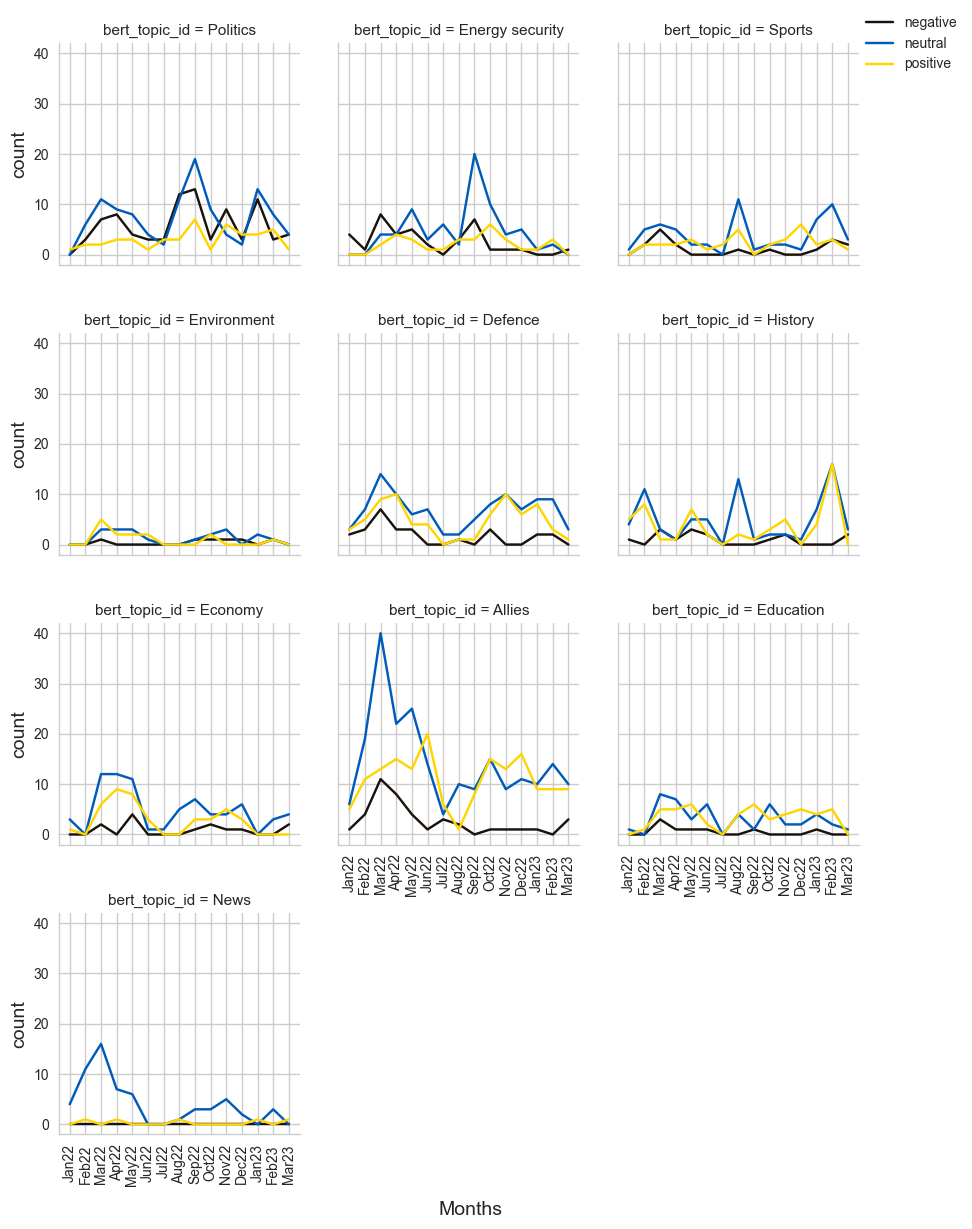

In [1496]:
from pandas.api.types import CategoricalDtype

label_counts = sentiments_topics.groupby(['bert_topic_id','month_year', 'sentiment']).size()
label_counts = label_counts.reset_index(name='count')

order = ['Jan22', 'Feb22', 'Mar22', 'Apr22', 'May22', 'Jun22', 'Jul22', 'Aug22', 'Sep22', 'Oct22', 'Nov22', 'Dec22','Jan23', 'Feb23', 'Mar23', 'Apr23']

label_counts['month_year'] = label_counts['month_year'].astype(CategoricalDtype(categories=order, ordered=True))
label_counts = label_counts.sort_values('month_year')

label_counts = label_counts[label_counts['bert_topic_id'] != 'War']
label_counts['bert_topic_id'] = label_counts['bert_topic_id'].cat.remove_unused_categories()
label_counts['sentiment'] = label_counts['sentiment'].astype('category')
# facet grid
g = sns.FacetGrid(data=label_counts, col="bert_topic_id", col_wrap=3, legend_out=False)

# lineplot
g.map_dataframe(sns.lineplot, x="month_year", y="count", hue = 'sentiment', dashes=False, 
                palette=[custom_palette[0], custom_palette[1], custom_palette[2]])
g.set(xlabel=None)
#g.set(ylabel=None)
g.fig.text(0.5, -0.01, 'Months')
#g.fig.text(0.5, -0.03, 'tim')


g.add_legend()
sns.move_legend(g, "upper left", bbox_to_anchor=(0.96, 1))

[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]

plt.savefig('leaders_sentiment_topics_months', facecolor=fig.get_facecolor(), bbox_inches='tight')

plt.show()

# LAHTINE
# y-axis skaala iga rea esimese järgi (?
# värvid

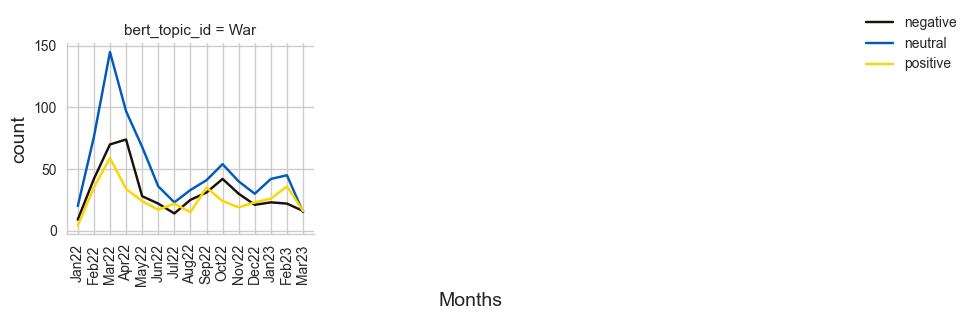

In [1499]:
from pandas.api.types import CategoricalDtype

label_counts = sentiments_topics.groupby(['bert_topic_id','month_year', 'sentiment']).size()
label_counts = label_counts.reset_index(name='count')

order = ['Jan22', 'Feb22', 'Mar22', 'Apr22', 'May22', 'Jun22', 'Jul22', 'Aug22', 'Sep22', 'Oct22', 'Nov22', 'Dec22','Jan23', 'Feb23', 'Mar23', 'Apr23']

label_counts['month_year'] = label_counts['month_year'].astype(CategoricalDtype(categories=order, ordered=True))
label_counts = label_counts.sort_values('month_year')

label_counts = label_counts[label_counts['bert_topic_id'] == 'War']
label_counts['bert_topic_id'] = label_counts['bert_topic_id'].cat.remove_unused_categories()
label_counts['sentiment'] = label_counts['sentiment'].astype('category')
# facet grid
g = sns.FacetGrid(data=label_counts, col="bert_topic_id", col_wrap=3, legend_out=False)

# lineplot
g.map_dataframe(sns.lineplot, x="month_year", y="count", hue = 'sentiment', dashes=False,
               palette=[custom_palette[0], custom_palette[1], custom_palette[2]])

g.set(xlabel=None)
#g.set(ylabel=None)
g.fig.text(0.5, -0.01, 'Months')
#g.fig.text(0.5, -0.03, 'tim')


g.add_legend()
sns.move_legend(g, "upper left", bbox_to_anchor=(0.96, 1))

[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]

plt.savefig('leaders_sentiment_topics_months_2', facecolor=fig.get_facecolor(), bbox_inches='tight')


plt.show()

## Top3 topics per month

In [1298]:
topTopicsPerMonth = (sentiments_topics.groupby(['month_year', 'bert_topic_id']).size() 
   .sort_values(ascending=False) 
   .reset_index(name='count') )

n_largest = 3
order = ['Jan22', 'Feb22', 'Mar22', 'Apr22', 'May22', 'Jun22', 'Jul22', 'Aug22', 'Sep22', 'Oct22', 'Nov22', 'Dec22','Jan23', 'Feb23', 'Mar23', 'Apr23']
topTopicsPerMonth['month_year'] = pd.Categorical(topTopicsPerMonth['month_year'], categories=order, ordered=True)


top3_per_month = (topTopicsPerMonth.groupby(['month_year', 'bert_topic_id'])
                 .sum()
                 .reset_index()
                 .sort_values(['month_year', 'count'], ascending=[True, False])
                 .groupby('month_year')
                 .head(n_largest))
top3_per_month

# top2 topic per moth

,month_year,bert_topic_id,count
2,Jan22,Ukraine war,33
9,Jan22,Allies,12
7,Jan22,History,10
14,Feb22,Ukraine war,153
21,Feb22,Allies,34
19,Feb22,History,19
26,Mar22,Ukraine war,274
33,Mar22,Allies,64
30,Mar22,Defence,30
38,Apr22,Ukraine war,205


# Compare negative sentiment posts vs positive sentiment posts

## sentiments of top n words

In [1299]:
# initialize CounVectorizer
def create_term_matrix(in_data):
    cv = CountVectorizer(analyzer = 'word')
    data = cv.fit_transform(in_data['lemma_text'])
    tm_matrix = pd.DataFrame(data.toarray(), columns = cv.get_feature_names_out())
    tm_matrix.index = in_data.index
    return tm_matrix.sum().transpose()

In [1300]:
# print top15 words
topn_words = create_term_matrix(sentiments_topics)
topn_words = pd.DataFrame(topn_words.items(), columns=['word', 'n'])
topn_words.sort_values(by='n', ascending=False).head(15)

,word,n
21480,ukraina,4969
2164,eesti,3882
22622,venemaa,2868
16661,riik,2334
3212,euroopa,2167
22,aasta,1809
5015,inimene,1753
18738,sõda,1708
21063,täna,1071
22613,vene,1033


In [1301]:
words_to_search = ['ukraina', 'eesti', 'venemaa', 'euroopa', 'sõda', 'inimene']
result = {}
for search_word in words_to_search:
    result[search_word] = {
        "positive": 0,
        "negative": 0,
        "neutral": 0,
    }
    
for idx, row in sentiments_topics.iterrows():
    text = row['lemma_text']
    sentiment = row['sentiment']
    for word in words_to_search:
        count = text.count(word)
        if count != 0:
            result[word][sentiment] = result[word][sentiment] + 1
result    

{'ukraina': {'positive': 649, 'negative': 434, 'neutral': 1054},
 'eesti': {'positive': 571, 'negative': 326, 'neutral': 829},
 'venemaa': {'positive': 325, 'negative': 357, 'neutral': 689},
 'euroopa': {'positive': 304, 'negative': 220, 'neutral': 507},
 'sõda': {'positive': 345, 'negative': 282, 'neutral': 606},
 'inimene': {'positive': 261, 'negative': 219, 'neutral': 360}}

In [1302]:
result = pd.DataFrame(result.items())
result = pd.json_normalize(result.to_dict(orient='records'))
result = pd.melt(result, id_vars=[0], value_vars=['1.positive', '1.negative', '1.neutral'], var_name='sentiment')
result['sentiment'] = result['sentiment'].str.split('.').str[1]  # extract the sentiment name from the column name
result.columns = ['word', 'sentiment', 'count']
result = result.loc[result.index.repeat(result['count'])].assign(count_new=1).reset_index(drop=True)

In [1303]:
result

,word,sentiment,count,count_new
0,ukraina,positive,649,1
1,ukraina,positive,649,1
2,ukraina,positive,649,1
3,ukraina,positive,649,1
4,ukraina,positive,649,1
...,...,...,...,...
8333,inimene,neutral,360,1
8334,inimene,neutral,360,1
8335,inimene,neutral,360,1
8336,inimene,neutral,360,1


In [1304]:
# sorting
negatives = result[result['sentiment'] == 'negative']['word'].value_counts()
negatives = negatives.rename('negative')
totals = result['word'].value_counts()
totals = totals.rename('total')
combined = pd.concat([negatives, totals], axis=1).reset_index()

proportions = []
for idx,row in combined.iterrows():
    proportions.append(row['negative'] / row['total'])
    
combined['proportions'] = proportions
combined = combined.sort_values(by=['proportions'], ascending=False)
label_order = list(combined['index'])

result["word"] = pd.Categorical(result["word"], categories = label_order)
result.sort_values('word')

,word,sentiment,count,count_new
4168,inimene,negative,219,1
4099,inimene,negative,219,1
4098,inimene,negative,219,1
4097,inimene,negative,219,1
4096,inimene,negative,219,1
...,...,...,...,...
3141,eesti,negative,326,1
3142,eesti,negative,326,1
3143,eesti,negative,326,1
3145,eesti,negative,326,1


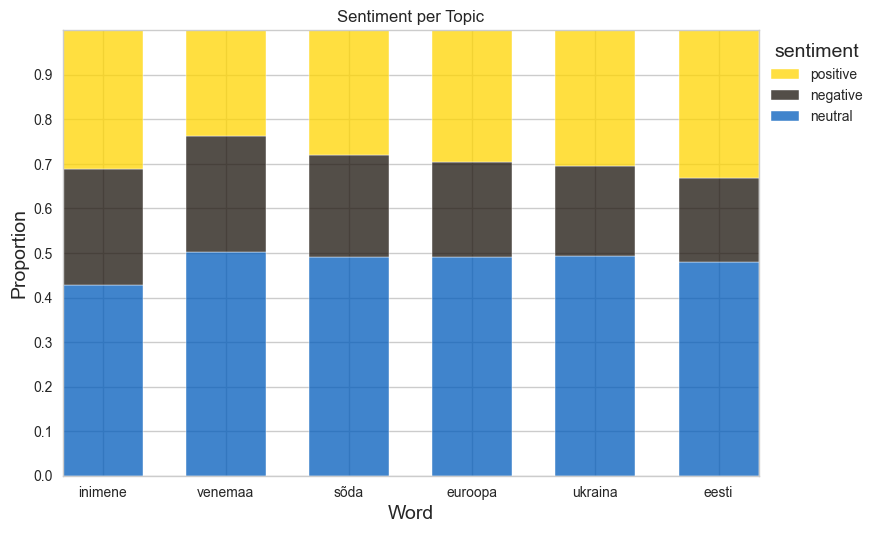

In [1305]:
hist = sns.histplot(result, x="word", hue="sentiment", stat="proportion", discrete=True,
             multiple='fill', palette = [custom_palette[2], custom_palette[0], custom_palette[1]], shrink=0.65)


sns.move_legend(hist, "upper left", bbox_to_anchor=(1, 1))

#plt.xticks(rotation=60)
#plt.title("Sentiment per Topic")
plt.xlabel("Word")
#plt.ylabel("Count")

plt.yticks(np.arange(0, 1, 0.1))

plt.show()

# sorteerida desc pos
# % joonisele?

## wordshift comparison negative vs positive dfs

In [1306]:
# subset data
neg_df = sentiments_topics[sentiments_topics["sentiment"] == 'negative'] 
pos_df = sentiments_topics[sentiments_topics["sentiment"] == 'positive'] 
print(len(neg_df))
print(len(pos_df))

# get terms and counts
term_neg = create_term_matrix(neg_df).sort_values(ascending=False)
term_pos = create_term_matrix(pos_df).sort_values(ascending=False)

# pandas series to to dict
from collections import OrderedDict, defaultdict

term_neg = term_neg.to_dict()
term_pos = term_pos.to_dict()

724
899


In [1592]:
my_dict = {
    "vene": "russian",
    "eesti": "estonian",
    "venemaa": "russia",
    "ukraina": "ukraine",
    "oluline": "important",
    "täna": "today",
    "koostöö": "cooperation",
    "euroopa": "europe",
    "toetama": "need to support",
    "inimene": "human",
    "kohtumine": "meeting",
    "julgeolek": "security",
    "toetus": "support",
    "riik": "country",
    "liitlane": "ally",
    "kohtuma": "to meet",
    "andma": "give",
    "venelane": "russian person",
    "hea": "good",
    "jääma": "stay",
    "ekre": "ekre",
    "arutama": "discuss",
    "aitama": "to help",
    "sõjaline": "millitary",
    "võtma": "take",
    "ütlema": "to say",
    "soome": "finland",
    "tuhat": "thousand",
    "valitsus": "government",
    "reformierakond": "reform party",
    "putin": "putin",
    "balit": "baltic",
    "mees": "men",
    "vajalik": "necessary",
    "meel": "emotion",
    "abi": "help",
    "toetamine": "supporting",
    "aasta": "year",
    "nägema": "to see",
    "ühine": "cojoint",
    "kultuur": "culture",
    "tugevdamine": "strengthening",
    "tagama": "guarantee",
    "euro": "euro",
    "lihtsalt": "simply",
    "ukrainlane": "ukrainian person",
    "kaja": "Kaja",
    "tallinna": "Tallinns",
    "uus": "new",
    "sõda": "war"
}

In [1594]:
new_neg = {}

for key in term_neg:
    current_value = term_neg[key]
    new_key = key
    if key in my_dict:
        new_key = my_dict[key]
    if new_key in new_neg:
        current_value = current_value + new_neg[new_key]
    new_neg[new_key] = current_value

In [1595]:
new_pos = {}

for key in list(term_pos.keys()):
    current_value = term_pos[key]
    new_key = key
    if key in my_dict:
        new_key = my_dict[key]
    if new_key in new_pos:
        current_value = current_value + new_pos[new_key]
    new_pos[new_key] = current_value

In [1596]:
new_neg = dict(sorted(new_neg.items(), key=lambda item: item[1], reverse=True))
new_pos = dict(sorted(new_pos.items(), key=lambda item: item[1], reverse=True))

C:\Users\lisannal\Anaconda3\lib\site-packages\shifterator\plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


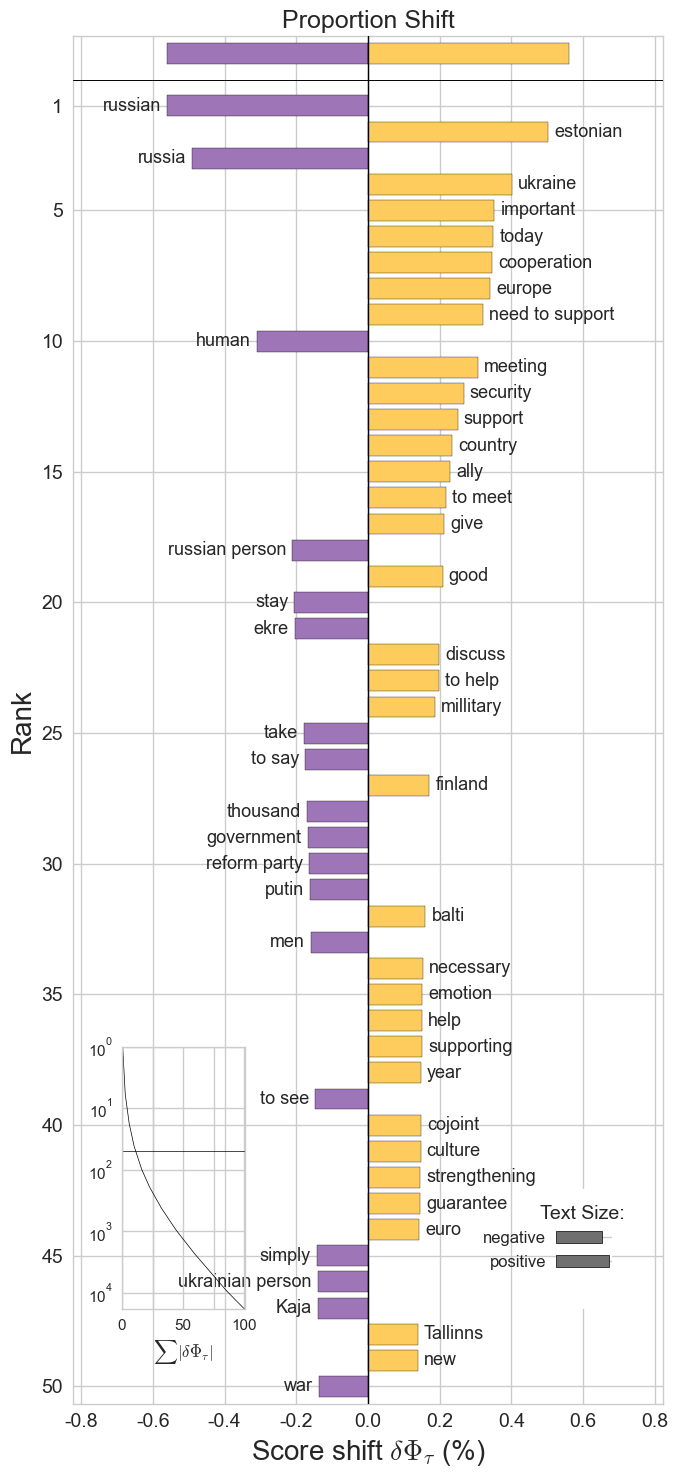

<Figure size 800x550 with 0 Axes>

In [1610]:
# translated words
proportion_shift = sh.ProportionShift(type2freq_1=new_neg,
                                      type2freq_2=new_pos)
proportion_shift.get_shift_graph(system_names = ['negative', 'positive'],
                                 title='Proportion Shift')



C:\Users\lisannal\Anaconda3\lib\site-packages\shifterator\plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


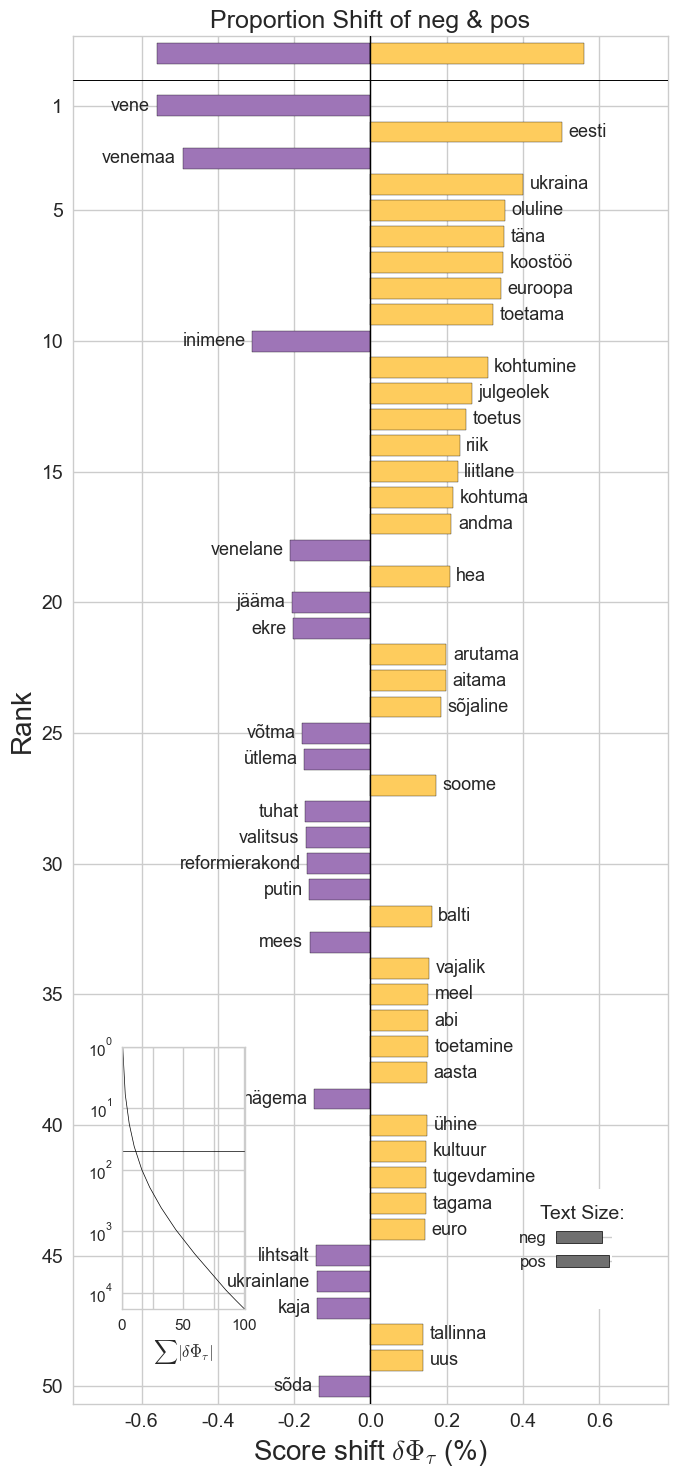

<Axes: title={'center': 'Proportion Shift of neg & pos'}, xlabel='Score shift $\\delta \\Phi_{\\tau}$ (%)', ylabel='Rank'>

In [1611]:
# proportion shifts: easy to interpret, simplistic 
# uses relative word frequencies
proportion_shift = sh.ProportionShift(type2freq_1=term_neg,
                                      type2freq_2=term_pos)
proportion_shift.get_shift_graph(system_names = ['neg', 'pos'],
                                 title='Proportion Shift of neg & pos')

## Topics count comparison negative vs positive sentiment datasets

In [1308]:
negs_df = sentiments_topics[sentiments_topics['sentiment'] == 'negative']
negs_df['bert_topic_id'].value_counts()[:5]

Ukraine war        472
Elections           51
Allies              41
Energy security     38
Religion            36
Name: bert_topic_id, dtype: int64

In [1309]:
pos_df = sentiments_topics[sentiments_topics['sentiment'] == 'positive']
pos_df['bert_topic_id'].value_counts()[:5]

Ukraine war    389
Allies         163
Defence         71
History         55
Education       50
Name: bert_topic_id, dtype: int64

# Political parties sentiment comparison

## Sentiment comparison

In [ ]:
negatives = sentiments_topics[sentiments_topics['sentiment'] == 'negative']['erakond'].value_counts()
negatives = negatives.rename('negative')
totals = sentiments_topics['erakond'].value_counts()
totals = totals.rename('total')
combined = pd.concat([negatives, totals], axis=1).reset_index()

proportions = []
for idx,row in combined.iterrows():
    proportions.append(row['negative'] / row['total'])
    
combined['proportions_erakond'] = proportions
combined = combined.sort_values(by=['proportions_erakond'], ascending=False)
label_order_erakond = list(combined['index'])
sentiments_topics["erakond"] = pd.Categorical(sentiments_topics["erakond"], categories = label_order_erakond)
sentiments_topics.sort_values('erakond')

In [ ]:
hist = sns.histplot(sentiments_topics, x="erakond", hue="sentiment", stat="proportion", discrete=True,
             multiple='fill', palette = [custom_palette[0], custom_palette[1], custom_palette[2]], shrink=0.65)


sns.move_legend(hist, "upper left", bbox_to_anchor=(1, 1))

#plt.xticks(rotation=60)
#plt.title("Sentiment per party")
plt.xlabel("Word")
#plt.ylabel("Count")
plt.yticks(np.arange(0, 1, 0.1))

plt.savefig('party_sentiment', facecolor=fig.get_facecolor(), bbox_inches='tight')

plt.show()

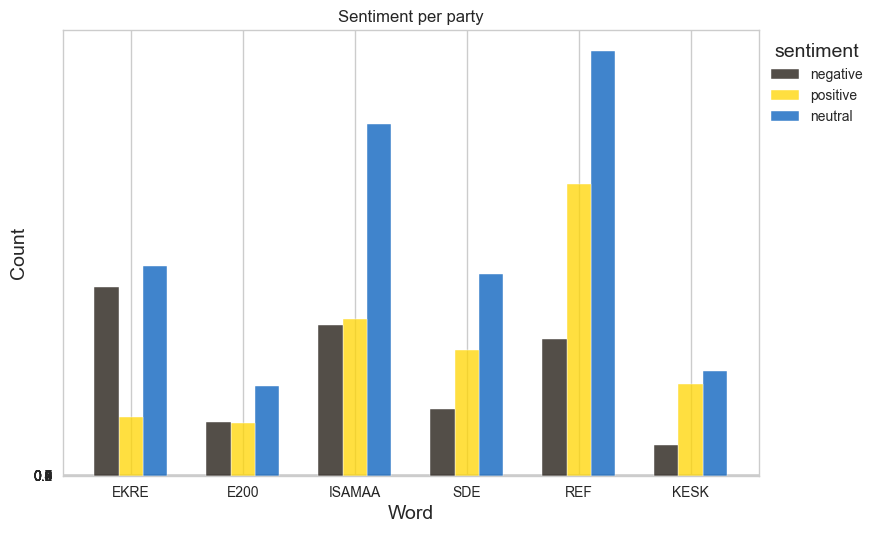

In [1312]:
hist = sns.histplot(sentiments_topics, x="erakond", hue="sentiment", stat="count", discrete=True,
             multiple='dodge', palette = [custom_palette[0], custom_palette[2], custom_palette[1]], shrink=0.65)


sns.move_legend(hist, "upper left", bbox_to_anchor=(1, 1))

#plt.xticks(rotation=60)
#plt.title("Sentiment per party")
plt.xlabel("Word")
#plt.ylabel("Count")
plt.yticks(np.arange(0, 1, 0.1))

plt.savefig('party_sentiment', facecolor=fig.get_facecolor(), bbox_inches='tight')
plt.show()

## Sentiments timeline

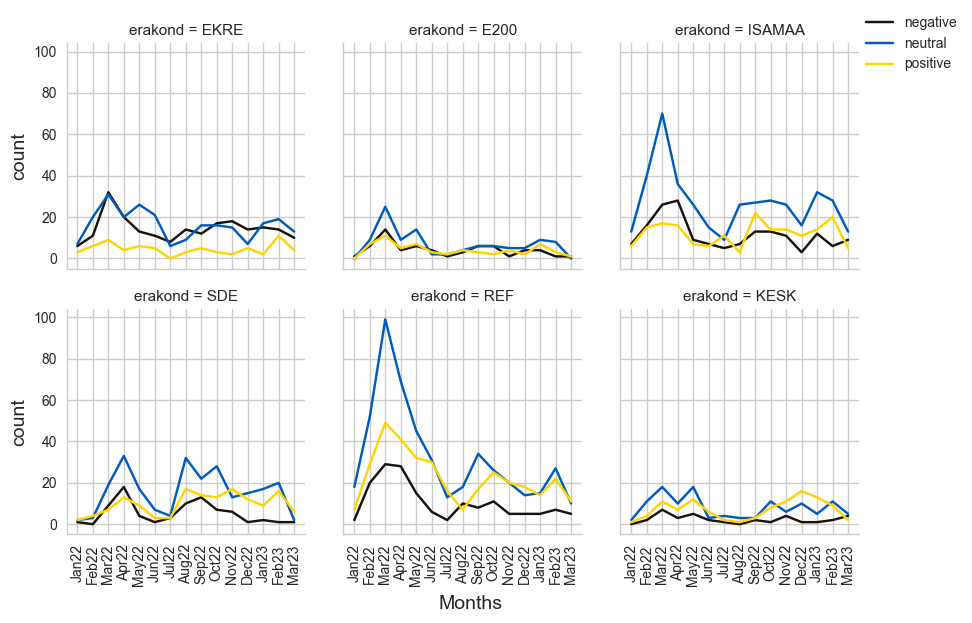

In [1615]:
from pandas.api.types import CategoricalDtype

label_counts = sentiments_topics.groupby(['erakond','month_year', 'sentiment']).size()
label_counts = label_counts.reset_index(name='count')

order = ['Jan22', 'Feb22', 'Mar22', 'Apr22', 'May22', 'Jun22', 'Jul22', 'Aug22', 'Sep22', 'Oct22', 'Nov22', 'Dec22','Jan23', 'Feb23', 'Mar23', 'Apr23']

label_counts['month_year'] = label_counts['month_year'].astype(CategoricalDtype(categories=order, ordered=True))
label_counts = label_counts.sort_values('month_year')

#label_counts = label_counts[label_counts['bert_topic_id'] != 'War']
label_counts['erakond'] = label_counts['erakond'].cat.remove_unused_categories()
label_counts['sentiment'] = label_counts['sentiment'].astype('category')
# facet grid
g = sns.FacetGrid(data=label_counts, col="erakond", col_wrap=3, legend_out=False)

# lineplot
g.map_dataframe(sns.lineplot, x="month_year", y="count", hue = 'sentiment', dashes=False, 
                palette=[custom_palette[0], custom_palette[1], custom_palette[2]])
g.set(xlabel=None)
#g.set(ylabel=None)
g.fig.text(0.5, -0.01, 'Months')
#g.fig.text(0.5, -0.03, 'tim')


g.add_legend()
sns.move_legend(g, "upper left", bbox_to_anchor=(0.96, 1))

[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]

plt.savefig('leaders_sentiment_parties_months', facecolor=fig.get_facecolor(), bbox_inches='tight')

plt.show()